<a href="https://colab.research.google.com/github/arash-pal/Simple-Linear-regression-Salary-experience-data-/blob/Importing-code-from-Colab/Salary_data_SLR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
salary_df = pd.read_csv('/content/drive/MyDrive/DATA/Salary_Data.csv')

In [ ]:
salary_df.info()

In [4]:
X = salary_df.drop(['Salary'], axis=1)
y = salary_df['Salary']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
class MyLinearRegression:

  def __init__(self, lr = 0.01, n_iters = 1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None
    self.cost_history = []

  def compute_cost(self, y, y_pred, m):
    return (1/(2*m))*np.sum((y_pred-y)**2)

  def fit(self, X, y):
    m, n = X.shape
    self.weights = np.zeros(n)
    self.bias = 0

    # Gradient Descent loop
    count = 1
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias
      # print(f"Iteration no. {count}",y_pred)
      cost = self.compute_cost(y, y_pred, m)
      self.cost_history.append(cost)

      # Calculate gradients for weights (dw) and bias (db)
      dw = (1/m)*np.dot(X.T, (y_pred-y))
      db = (1/m)*np.sum(y_pred - y)

      # # Update weights and bias using the learning rate and gradients
      self.weights -= self.lr*dw
      self.bias -= self.lr*db
      count+=1

  def predict(self, X):
    # Make predictions using the learned weights and bias
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred

In [40]:
mylr = MyLinearRegression(n_iters=1500)


In [41]:
mylr.fit(X_train, y_train)


In [42]:
print("Weights:", mylr.weights)
print("Bias:", mylr.bias)
print("Cost History:")
for i, cost in enumerate(mylr.cost_history):
    print(f"Iteration {i+1:4d}: Cost = {cost:,.4f}")

Weights: [9532.41716883]
Bias: 24589.255081129377
Cost History:
Iteration    1: Cost = 3,135,539,921.2292
Iteration    2: Cost = 1,330,923,937.6622
Iteration    3: Cost = 591,129,292.1836
Iteration    4: Cost = 287,751,553.7849
Iteration    5: Cost = 163,239,706.7622
Iteration    6: Cost = 112,036,686.6211
Iteration    7: Cost = 90,880,018.1962
Iteration    8: Cost = 82,038,609.8435
Iteration    9: Cost = 78,245,385.3682
Iteration   10: Cost = 76,521,936.2643
Iteration   11: Cost = 75,647,560.7821
Iteration   12: Cost = 75,121,951.7807
Iteration   13: Cost = 74,740,055.2424
Iteration   14: Cost = 74,417,826.4030
Iteration   15: Cost = 74,120,816.0523
Iteration   16: Cost = 73,834,901.6914
Iteration   17: Cost = 73,554,291.7228
Iteration   18: Cost = 73,276,608.9773
Iteration   19: Cost = 73,000,875.7030
Iteration   20: Cost = 72,726,687.7134
Iteration   21: Cost = 72,453,875.9135
Iteration   22: Cost = 72,182,367.5761
Iteration   23: Cost = 71,912,129.4861
Iteration   24: Cost = 71,643

In [43]:
y_pred_train = mylr.predict(X_train)
print(y_pred_train)


[122773.15192013 107521.28444999  62718.92375647  35074.91396685
  45560.57285257  73204.58264219  52233.26487075  63672.16547335
  62718.92375647  99895.35071492  36981.39740061  38887.88083438
 110381.00960064  43654.0894188   92269.41697986 115147.21818506
  80830.51637726 124679.6353539   89409.69182921  55092.9900214
  61765.68203959  67485.13234089  81783.75809414  53186.50658763]


In [44]:
# Calculating evaluation metrics (MSE, RMSE, R2 Score) on the training set
mse_train = np.mean((y_train - y_pred_train) ** 2)

rmse_train = np.sqrt(mse_train)

ss_res_train = np.sum((y_train - y_pred_train) ** 2)
ss_tot_train = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train = 1 - (ss_res_train / ss_tot_train)


print("MSE on Training Set:", mse_train)
print("RMSE on Training Set:", rmse_train)
print("R2 Score on Training Set:", r2_train)

MSE on Training Set: 27228701.908034485
RMSE on Training Set: 5218.112868464468
R2 Score on Training Set: 0.9643747107705292


In [45]:
# Making predictions on the testing data using the trained model
y_pred_test = mylr.predict(X_test)
print(y_pred_test)

[116100.45990194  71298.09920842 102755.07586558  75111.06607595
  55092.9900214   59859.19860582]


In [46]:
# Calculating evaluation metrics (MSE, RMSE, R2 Score) on the testing set
mse_test = np.mean((y_test - y_pred_test) ** 2)

rmse_test = np.sqrt(mse_test)

ss_res_test = np.sum((y_test - y_pred_test) ** 2)
ss_tot_test = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test = 1 - (ss_res_test / ss_tot_test)

print("MSE on Test Set:", mse_test)
print("RMSE on Test Set:", rmse_test)
print("R2 Score on Test Set:", r2_test)

MSE on Test Set: 50629462.73329226
RMSE on Test Set: 7115.4383373965275
R2 Score on Test Set: 0.9008812357081055


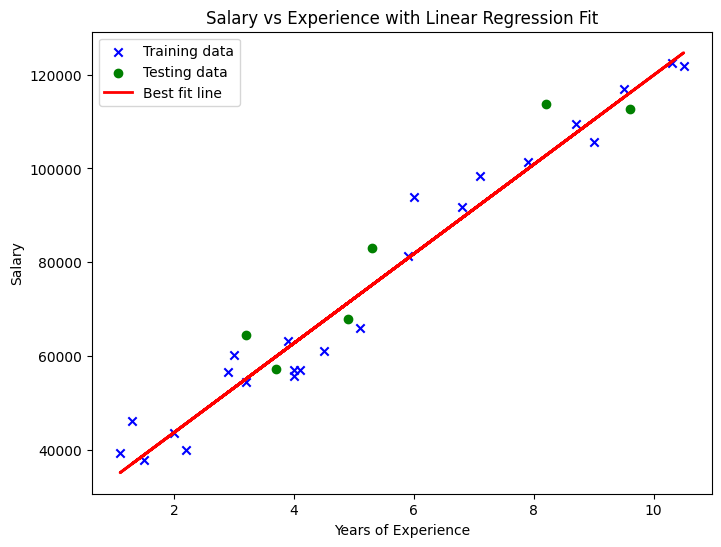

In [47]:
# Visualizing the training and testing data along with the best-fit line from the trained model
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, marker='x', color='blue', label='Training data')
plt.scatter(X_test, y_test, marker='o', color='green', label='Testing data')
plt.plot(X_train, mylr.predict(X_train), color='red', linewidth=2, label='Best fit line')
plt.title('Salary vs Experience with Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

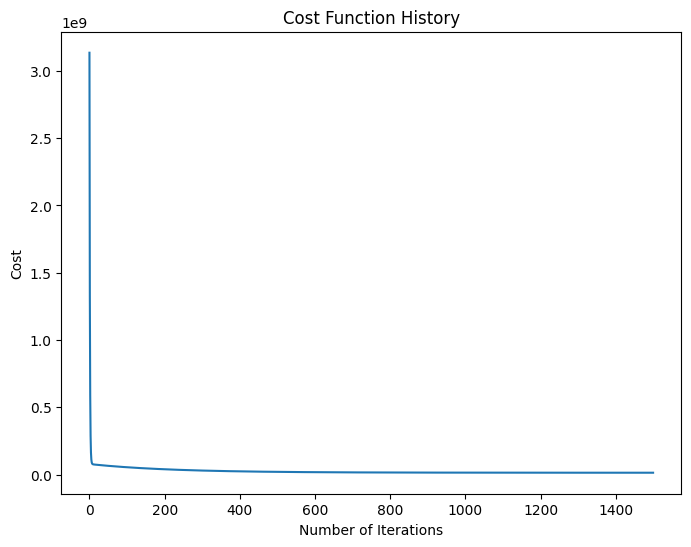

In [48]:
# Plotting the cost history to visualize how the cost function decreased during training
plt.figure(figsize=(8, 6))
plt.plot(mylr.cost_history)
plt.title('Cost Function History')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [49]:
# Example prediction-1
predicted_salary_9_3 = 9.3 * mylr.weights[0] + mylr.bias
print(f"Predicted salary for 9.3 years of experience will be ${predicted_salary_9_3}")

Predicted salary for 9.3 years of experience will be $113240.73475129377


In [50]:
# Example prediction-2
predicted_salary_5 = 5 * mylr.weights[0] + mylr.bias
print(f"Predicted salary for 5 years of experience will be ${predicted_salary_5}")

Predicted salary for 5 years of experience will be $72251.34092530378


### **Project: Linear Regression from Scratch with Gradient Descent**

This project demonstrates the fundamental principles of Linear Regression by building a model from scratch using Gradient Descent. The goal is to predict salaries based on years of experience, using a simple `Salary_Data.csv` dataset.

**Key Features:**

- **Custom Linear Regression Implementation**: A `MyLinearRegression` class is implemented from the ground up, featuring:
  - Initialization of learning rate (`lr`), number of iterations (`n_iters`), weights, and bias.
  - A `compute_cost` method to calculate the Mean Squared Error (MSE).
  - A `fit` method that employs Gradient Descent to iteratively update weights and bias, minimizing the cost function.
  - A `predict` method to generate predictions based on the learned parameters.

- **Data Preparation**: The dataset is loaded using pandas, and split into training and testing sets to ensure robust model evaluation.

- **Model Training**: The custom Linear Regression model is trained on the `X_train` and `y_train` data, with the cost history tracked to monitor convergence.

- **Performance Evaluation**: The model's performance is assessed on both training and testing datasets using key regression metrics:
  - **Mean Squared Error (MSE)**
  - **Root Mean Squared Error (RMSE)**
  - **R-squared (R2) Score**

- **Visualizations**:
  - A scatter plot illustrates the training and testing data points, along with the model's best-fit line, providing a clear visual representation of the regression.
  - A plot of the cost function history demonstrates the optimization process during Gradient Descent.

- **Example Predictions**: The model is used to make predictions for new data points, showcasing its practical application.

This project serves as a foundational exercise in understanding linear regression, the mechanics of gradient descent, and the basic workflow of building and evaluating a machine learning model without relying on high-level libraries like scikit-learn for the core algorithm.